# Project 1 Used car price prediction

The purpose of the project is to identify the factors(Independent variables) affecting the price of an used car. 
Make a machine learning model to predict the price of the used car. 
Train and test your model and identify the parameters of the model. 
Improve your model using other algorithams.
Finalize a model which can predict the price with much accuracy and efficiency. 
Interpret your results. 

In [1]:
import pandas as pd 
import numpy as np
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
from scipy.stats import skew
plt.style.use('ggplot')


from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations
import statsmodels.api as sm

In [2]:
cars=pd.read_csv("F:\\used_cars_data.csv")

In [3]:
df=cars.copy()

In [4]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00000,NaN,12.50000
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00000,8.61 Lakh,4.50000
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00000,NaN,6.00000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00000,NaN,17.74000


In [5]:
df.shape

(7253, 14)

the dataset has 7253 Observations and 14 variables. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


Mileage, engine, power and new_price are quantitative variables but are of object dtype here and needs to be converted to numeric and each value has suffix like kmpl/cc/bhp whic is the unit of measurment. we need to remove that before changing it to a quantitative variable. Some of the categorical variables like Location, Fuel_Type, Transmission and Owner_Type are also considered here as object data type. so we need to change those values to categorical data type.

In [7]:
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [8]:
df["Location"].unique().tolist() # making a list of all the unique values in column location of the dataframe df

['Mumbai',
 'Pune',
 'Chennai',
 'Coimbatore',
 'Hyderabad',
 'Jaipur',
 'Kochi',
 'Kolkata',
 'Delhi',
 'Bangalore',
 'Ahmedabad']

In [9]:
df["Location"].isnull().sum() # sum of count of all the missing values in the column location of the dataframe df

0

we need to check nature of unique values of each variable which is categorical. 
need to check the total number of missing values in each variable and the percent of that too.
for that we can use for loop to find the unique values and missing values.

In [10]:
# Making a list of all categorical variables
cat_col = ["Location","Year","Fuel_Type","Transmission","Owner_Type","Seats"]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(cars[column].value_counts())

Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
Year
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: count, dtype: int64
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64
Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64
Seats
5.00000     6047
7.00000      796
8.00000      170
4.00000      119
6.00000       38
2.00000       18
10.00000       8
9.00000   

Mumbai has highest numbers of car availabe for purchase and Hyderabad stands second. there are total of 11 locations in which
cars are available for purchase.
There are 23 distinct year values ranging from 1996-2019.
Maximum number of cars being sold/available have fuel type as Diesel. there are 5 distinct categories in Fuel_Type.
All the cars have either manual transmission or automatic transmission. Most of them are from manual transmission.
Most of the cares are First Owner_Type. there are 4 categories in Owner_Type.
Cars having 5 seats are the majority. 9 categories in Seats variable. One category is 0 which is not possible. we will deal with
that after we dealt with missing values.


In [11]:
df1=df.isnull().sum().sort_values(ascending=False)
df1

New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

In [12]:
missing_percent=round(df.isna().sum()/df.isna().count()*100.2).sort_values(ascending=False)
missing_percent

New_Price           86.00000
Price               17.00000
Engine               1.00000
Power                1.00000
Seats                1.00000
S.No.                0.00000
Name                 0.00000
Location             0.00000
Year                 0.00000
Kilometers_Driven    0.00000
Fuel_Type            0.00000
Transmission         0.00000
Owner_Type           0.00000
Mileage              0.00000
dtype: float64

In [13]:
df1=pd.DataFrame(df1)

<BarContainer object of 14 artists>

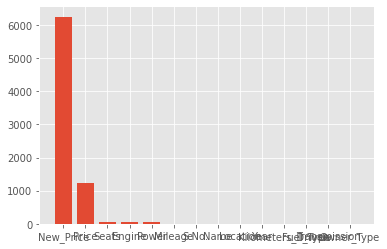

In [14]:
import matplotlib.pyplot as plt
plt.bar(df1.index,df1[0])

86 percentage of the missing values are from variable New_price. Price also has a substantial amount of missing values.
Seats, Engine, Power are the other variables which has significant amount of missing values.
Mileage has two missing values.

# Dealing with 3 variables Engine, Mileage, Power

In [15]:
df[['Engine','Power','Mileage']].sample(10)

,Engine,Power,Mileage
5634,1461 CC,84.8 bhp,21.64 kmpl
6746,796 CC,46.3 bhp,19.7 kmpl
1724,3198 CC,197 bhp,10.91 kmpl
6012,2494 CC,102 bhp,12.8 kmpl
5396,1248 CC,88.50 bhp,25.47 kmpl
3809,1991 CC,147.9 bhp,18.3 kmpl
1328,1197 CC,85.8 bhp,19.1 kmpl
287,1396 CC,98.6 bhp,15.0 kmpl
4680,1248 CC,88.50 bhp,25.47 kmpl
3831,1461 CC,108.45 bhp,19.64 kmpl


# Handling Mileage variable

In [16]:
df['Fuel_Type'].unique().tolist()

['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric']

In [17]:
typeoffuel=['CNG','LPG']
df.loc[df.Fuel_Type.isin(typeoffuel)].head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,1.75000
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.00000,NaN,2.35000
127,127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00000,NaN,3.25000
328,328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.00000,NaN,1.40000
440,440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.00000,NaN,4.70000


some of the mileage values have unit of measurment km/kg instead of km/ltr. since both the units are in km, no 
need to convert the vaues. but need to remove the unit of measurment and then change it to a quantitative variable.


In [18]:
df["Mileage"] = df["Mileage"].str.rstrip(" kmpl") ## removing kmpl & km/g from mileage variable observations
df["Mileage"] = df["Mileage"].str.rstrip(" km/g")

In [19]:
df[df.Mileage.isnull()==True] ## mileage variable has two zero observations

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.00000,13.58 Lakh,13.00000
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.00000,NaN,12.75000


In [20]:
df.query("Mileage == '0.0'")['Mileage'].count()

81

In [21]:
df.loc[df["Mileage"]=='0.0','Mileage']=np.nan

There are total of 83 missing values found in mileage variable. changing it to nan values and deal with them later

# Handling Power variable

In [22]:
df["Power"] = df["Power"].str.rstrip("bhp") ## removing kmpl & km/g from mileage variable observations

In [23]:
df[['Engine','Power','Mileage']].sample(50)

,Engine,Power,Mileage
6104,2496 CC,179.5,11.07
2901,1248 CC,74,23.4
4721,796 CC,47.3,22.74
3576,1498 CC,99,25.83
675,2143 CC,170,14.84
7061,1498 CC,98.6,27.3
2495,1798 CC,177.46,14.67
6038,1298 CC,85.8,17.5
2024,1968 CC,140.8,15.2
5899,1248 CC,73.9,19.3


Power variable has some null values. 

In [24]:
df[df.Power.isnull()==True]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,2.95000
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,2.11000
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,NaN,1.75000
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,NaN,NaN,NaN,NaN,NaN,26.50000
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8,NaN,NaN,NaN,NaN,3.20000
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,5.80000
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,NaN,NaN,NaN,NaN,NaN,1.50000
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,40.88000
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1,NaN,NaN,NaN,NaN,3.15000
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,NaN,NaN,NaN,NaN,NaN,1.93000


In [25]:
df['Power'].isna().sum()

46

In [26]:
df.query("Power == 'null '")['Power'].count()

129

In [27]:
df["Power"]= df["Power"].replace(regex="null ", value = np.nan)

In [28]:
df['Power'].isna().sum()

175

There are total of 175 missing values found in Power variable and deal with them later

# Handling with engine variable

In [29]:
df['Engine']=df['Engine'].str.rstrip(' CC')

In [30]:
df.query("Power == '0.0'")['Power'].count()

0

In [31]:
df['Engine'].isna().sum()

46

There are total of 46 missing values found in Engine variable and deal with them later


# Processing Seats

In [32]:
df['Seats'].isna().sum()

53

In [33]:
df.query("Seats == 0.0 ")['Seats']

3999   0.00000
Name: Seats, dtype: float64

In [34]:
#seats cannot be 0 so changing it to nan and will be handled in missing value
df.loc[3999,'Seats'] =np.nan

In [35]:
df['Seats'].isna().sum()

54

There are total of 54 missing values found in Seats variable and deal with them later

# Processing New_Price

In [36]:
df['New_Price'].sample(50)

319            NaN
3563           NaN
4833           NaN
6212       1.58 Cr
3314           NaN
3528           NaN
2217           NaN
645            NaN
5107    79.43 Lakh
3559           NaN
2030    23.06 Lakh
948            NaN
7152     6.46 Lakh
2663           NaN
2282           NaN
1933           NaN
396            NaN
5731           NaN
5607           NaN
5416           NaN
14             NaN
6595           NaN
4074           NaN
5895           NaN
5734           NaN
4579           NaN
261     14.07 Lakh
2453           NaN
3759     4.82 Lakh
782            NaN
6507    10.86 Lakh
3678           NaN
2915     6.96 Lakh
701            NaN
3704           NaN
7055           NaN
5624           NaN
3254     8.24 Lakh
558     15.38 Lakh
2319     92.5 Lakh
2284           NaN
5115           NaN
993            NaN
1573           NaN
2926           NaN
3102           NaN
1333           NaN
2716           NaN
3343           NaN
331            NaN
Name: New_Price, dtype: object

New_Price has some values in lakhs and some in crores

In [37]:
# Create a new column after splitting the New_Price values.
import re

new_price_num = []

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "Lakh"]  format
            # that we see in the sample output
            print(
                "The value is in crores ",
                observation,
            )
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

The value is in crores  1.28 Cr
The value is in crores  1.04 Cr
The value is in crores  1 Cr
The value is in crores  1.04 Cr
The value is in crores  1.39 Cr
The value is in crores  1.02 Cr
The value is in crores  1.4 Cr
The value is in crores  1.06 Cr
The value is in crores  1.27 Cr
The value is in crores  1.13 Cr
The value is in crores  1.36 Cr
The value is in crores  1.66 Cr
The value is in crores  1.6 Cr
The value is in crores  1.28 Cr
The value is in crores  2.3 Cr
The value is in crores  1.71 Cr
The value is in crores  1.39 Cr
The value is in crores  1.58 Cr
The value is in crores  3.75 Cr
The value is in crores  1.06 Cr


In [38]:
new_price_num = []

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

# Add the new column to the data
df["new_price_num"] = new_price_num

# Checking the new dataframe
df.sample(50)  # Looks ok

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num
5996,5996,Jaguar XF 2.2 Litre Luxury,Kochi,2016,31150,Diesel,Automatic,First,16.36,2179,187.7,5.00000,NaN,30.54000,NaN
6656,6656,Honda Mobilio V i DTEC,Mumbai,2015,30000,Diesel,Manual,First,24.2,1498,98.6,7.00000,NaN,NaN,NaN
5598,5598,Skoda Laura Ambiente,Ahmedabad,2009,60002,Diesel,Manual,Second,17.5,1896,106,5.00000,NaN,4.85000,NaN
723,723,BMW 3 Series 320d Luxury Plus,Ahmedabad,2015,100000,Diesel,Automatic,First,18.88,1995,184,5.00000,NaN,24.75000,NaN
5967,5967,Maruti Ertiga VXI,Bangalore,2014,42000,Petrol,Manual,Second,16.02,1373,93.7,7.00000,NaN,5.94000,NaN
4338,4338,Hyundai i20 1.2 Magna,Bangalore,2010,52000,Petrol,Manual,First,18.5,1197,80,5.00000,NaN,3.65000,NaN
2259,2259,Hyundai Santa Fe 4WD AT,Bangalore,2015,59000,Diesel,Automatic,First,13.01,2199,194.3,7.00000,NaN,21.00000,NaN
1705,1705,Hyundai i10 Era 1.1,Kochi,2013,34697,Petrol,Manual,First,19.81,1086,68.05,5.00000,NaN,3.70000,NaN
4087,4087,Maruti Celerio VXI AT Optional,Pune,2017,20000,Petrol,Automatic,First,23.1,998,67.04,5.00000,NaN,4.70000,NaN
6052,6052,Mitsubishi Pajero 2.8 SFX,Chennai,2012,121000,Diesel,Manual,First,10.5,2835,107.2,6.00000,NaN,NaN,NaN


In [39]:
df['new_price_num'].isna().sum()

6247

There are total of 6247 missing values found in new_price_num variable and deal with them later

converting year variable into Age of car by substracting the year from current year

In [40]:
df['Current_year']=2023
df['Age_of_car']=df['Current_year']-df['Year']
df.drop('Current_year',axis=1,inplace=True)
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Age_of_car
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.00000,NaN,1.75000,NaN,13
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.00000,NaN,12.50000,NaN,8
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.00000,8.61 Lakh,4.50000,8.61000,12
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.00000,NaN,6.00000,NaN,11
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.00000,NaN,17.74000,NaN,10


# Converting data type

In [41]:
#converting object data type to category data type
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
df["Location"] = df["Location"].astype("category")

#converting datatype  
df["Mileage"] = df["Mileage"].astype(float)
df["Power"] = df["Power"].astype(float)
df["Engine"]=df["Engine"].astype(float)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7170 non-null   float64 
 9   Engine             7207 non-null   float64 
 10  Power              7078 non-null   float64 
 11  Seats              7199 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
 14  new_price_num      1006 non-null   float64 
 15  Age_of_car         7253 non-null   int64   
dtypes: cat

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.00000,3626.00000,2093.90508,0.00000,1813.00000,3626.00000,5439.00000,7252.00000
Year,7253.00000,2013.36537,3.25442,1996.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,7253.00000,58699.06315,84427.72058,171.00000,34000.00000,53416.00000,73000.00000,6500000.00000
Mileage,7170.00000,18.34653,4.15791,6.40000,15.30000,18.20000,21.10000,33.54000
Engine,7207.00000,1616.57347,595.28514,72.00000,1198.00000,1493.00000,1968.00000,5998.00000
Power,7078.00000,112.76521,53.49355,34.20000,75.00000,94.00000,138.10000,616.00000
Seats,7199.00000,5.28046,0.80933,2.00000,5.00000,5.00000,5.00000,10.00000
Price,6019.00000,9.47947,11.18792,0.44000,3.50000,5.64000,9.95000,160.00000
new_price_num,1006.00000,22.77969,27.75934,3.91000,7.88500,11.57000,26.04250,375.00000
Age_of_car,7253.00000,9.63463,3.25442,4.00000,7.00000,9.00000,12.00000,27.00000


# Processing Name variable

Brands do play an important role in Car selection and Prices. So extracting brand names from the Name.

In [44]:
df['Name'].isnull().sum()

0

In [45]:
#As mentioned in dataset car name has Brand and model so extracting it ,This can help to fill missing values of price column
df['Brand'] = df['Name'].str.split(' ').str[0] #Separating Brand name from the Name
df['Model'] = df['Name'].str.split(' ').str[1] + df['Name'].str.split(' ').str[2]

In [46]:
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [47]:
col=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
df[df.Brand.isin(col)].sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Age_of_car,Brand,Model
365,365,Mini Clubman Cooper S,Pune,2017,8350,Petrol,Manual,First,13.80000,1998.00000,192.00000,5.00000,44.59 Lakh,35.00000,44.59000,6,Mini,ClubmanCooper
7160,7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.80000,1998.00000,112.00000,5.00000,NaN,NaN,NaN,10,Mini,CooperCountryman
1117,1117,Mini Cooper 5 DOOR D,Ahmedabad,2014,34000,Diesel,Automatic,First,20.70000,1496.00000,113.98000,5.00000,42.12 Lakh,22.00000,42.12000,9,Mini,Cooper5
5022,5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,NaN,2179.00000,115.00000,5.00000,NaN,26.00000,NaN,10,Land,RoverFreelander
2711,2711,Mini Cooper Convertible S,Kochi,2017,20469,Petrol,Automatic,First,16.82000,1998.00000,189.08000,4.00000,44.28 Lakh,35.98000,44.28000,6,Mini,CooperConvertible


Brand names like ISUZU and Isuzu are same and needs to be corrected. Land, Mini seems to be incorrect. So correcting brand names.

In [48]:
#changing brandnames
df.loc[df.Brand == 'ISUZU','Brand']='Isuzu'
df.loc[df.Brand=='Mini','Brand']='Mini Cooper'
df.loc[df.Brand=='Land','Brand']='Land Rover'
#cars['Brand']=cars["Brand"].astype("category")

In [49]:
df.Brand.nunique()

32

In [50]:
df.groupby(df.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

There are 32 unique Brands in the dataset.Maruti brand is most available for purchase/Sold followed by Hyundai.

In [51]:
df.Model.isnull().sum()

1

In [52]:
#drop row with no model
df.dropna(subset=['Model'],axis=0,inplace=True)

In [53]:
df.Model.isnull().sum()

0

In [54]:
df.Model.nunique()

726

In [55]:
df.groupby(df.Model).size().nlargest(30)

Model
SwiftDzire      189
Grandi10        179
WagonR          178
Innova2.5       145
Verna1.6        127
City1.5         122
Cityi           115
Creta1.6        110
NewC-Class      110
3Series         109
SwiftVDI         96
5Series          86
i201.2           78
SantroXing       76
XUV500W8         75
i10Sportz        75
AmazeS           69
i10Magna         69
Alto800          63
CorollaAltis     63
FigoDiesel       61
Ecosport1.5      59
A42.0            56
AltoK10          56
VitaraBrezza     55
i20Asta          54
InnovaCrysta     53
i20Sportz        53
Duster110PS      51
Fortuner4x2      50
dtype: int64

There are 726 unique models and Swift Dzire is most popular Model.

In [56]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Age_of_car,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60000,998.00000,58.16000,5.00000,NaN,1.75000,NaN,13,Maruti,WagonR
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67000,1582.00000,126.20000,5.00000,NaN,12.50000,NaN,8,Hyundai,Creta1.6
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20000,1199.00000,88.70000,5.00000,8.61 Lakh,4.50000,8.61000,12,Honda,JazzV
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77000,1248.00000,88.76000,7.00000,NaN,6.00000,NaN,11,Maruti,ErtigaVDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20000,1968.00000,140.80000,5.00000,NaN,17.74000,NaN,10,Audi,A4New


# EDA


# Quantitative variables

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7252.00000,3625.52551,2093.65947,0.00000,1812.75000,3625.50000,5438.25000,7252.00000
Year,7252.00000,2013.36652,3.25316,1996.00000,2011.00000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,7252.00000,58700.26269,84433.48037,171.00000,34000.00000,53429.00000,73000.00000,6500000.00000
Mileage,7169.00000,18.34711,4.15791,6.40000,15.30000,18.20000,21.10000,33.54000
Engine,7206.00000,1616.60505,595.32041,72.00000,1198.00000,1493.00000,1968.00000,5998.00000
Power,7077.00000,112.76871,53.49652,34.20000,75.00000,94.00000,138.10000,616.00000
Seats,7198.00000,5.28049,0.80938,2.00000,5.00000,5.00000,5.00000,10.00000
Price,6019.00000,9.47947,11.18792,0.44000,3.50000,5.64000,9.95000,160.00000
new_price_num,1006.00000,22.77969,27.75934,3.91000,7.88500,11.57000,26.04250,375.00000
Age_of_car,7252.00000,9.63348,3.25316,4.00000,7.00000,9.00000,12.00000,27.00000


In [58]:
import seaborn as sns

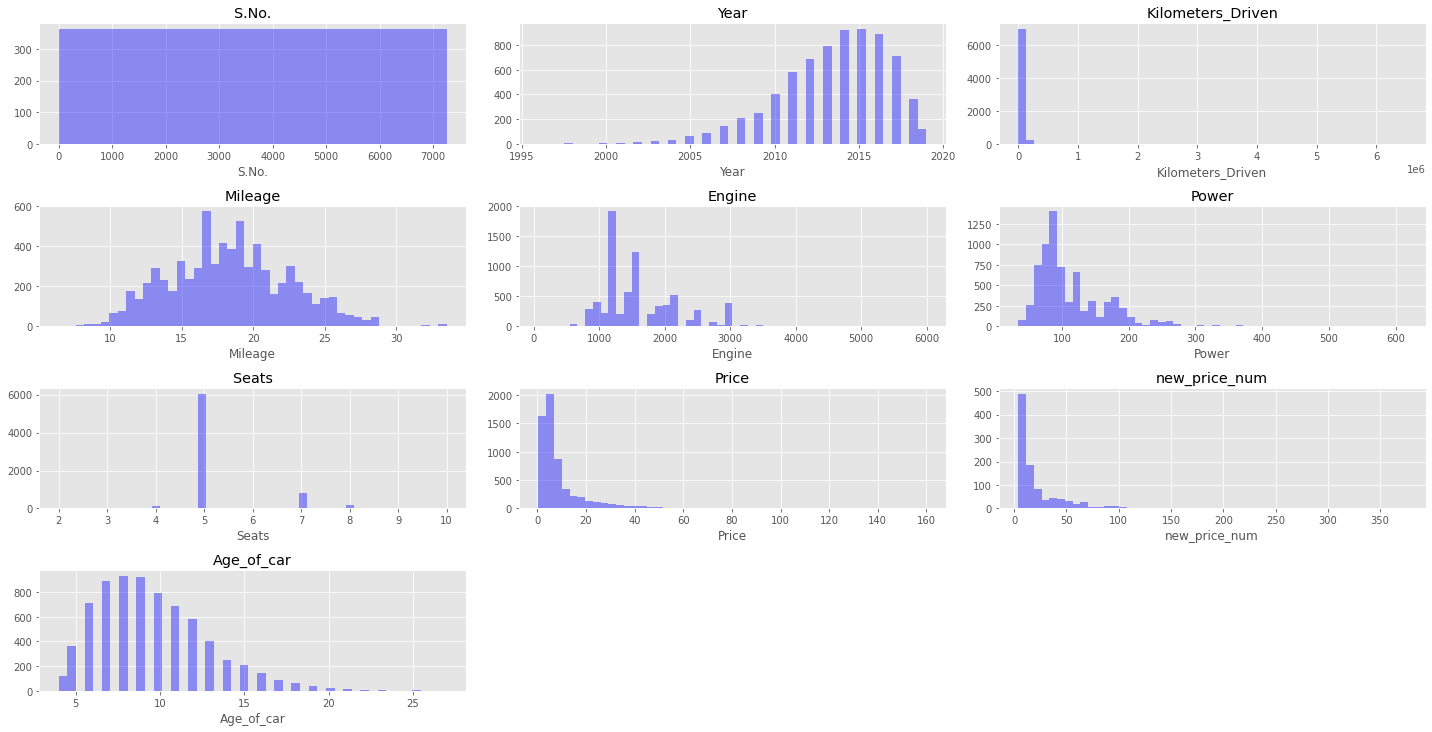

In [59]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(df[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

In [60]:
df['Kilometers_Driven'].median()

53429.0

Kilometer driven , median is ~53k Km and mean is ~58K. Max values seems to be 6500000. This is very high , and seems to be outlier.

Mileage has an average of ~18 and a standerd deviation of ~4. the maximum value is inside 3 standard deviation from the mean. we can say it is almost normally distributed.

Engine is right skewed and has outliers on higher and lower end. has an average of ~1600 and standard deviation of ~595.

Power has an average of ~112 and a standard deviation of 53. and the distribution is right skewed.

Most of the cars are 5 seaters.

Distribution of price variable is also right skewed. Maximum value is 160 which seems to be an outlier.

Distribution of new_price_num variable is also right skewed with some outliers.

Age of the car variable is right skewed with the presenece of potential outliers. Car being sold/available for purchase are in 
4 - 27 years old


# Categorical variables

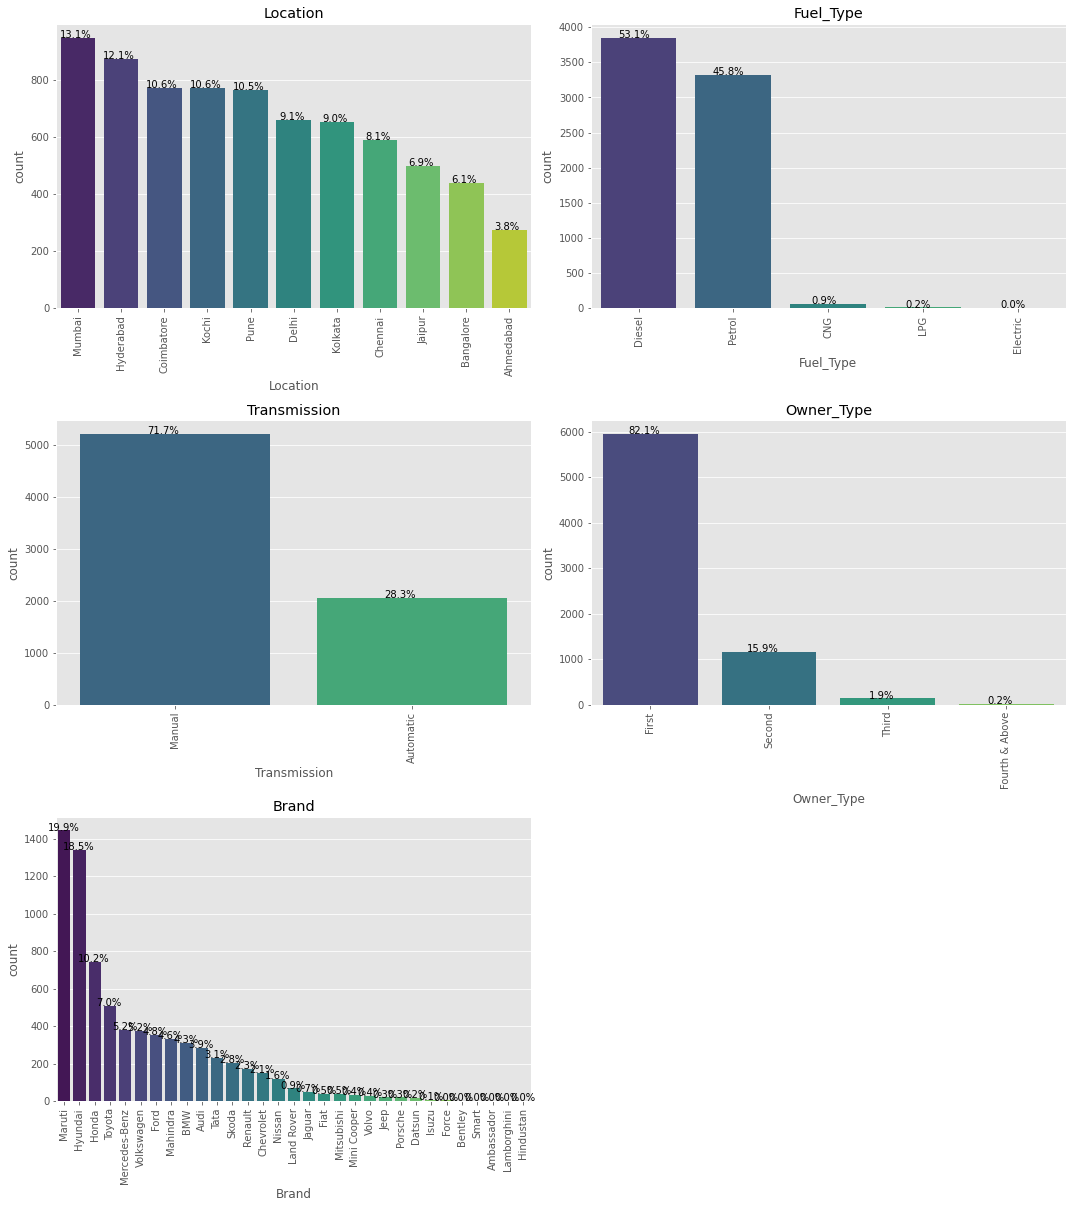

In [61]:
cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type', 'Brand'] #cars.select_dtypes(exclude=np.number).columns.tolist()

plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = df[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=df[variable], data=df , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

Mumbai has highest numbers of car availabe for purchase whereas Ahmedabad has least

~53% of car being sold/avialable for purchase have fuel type as Diesel

~71 % cars available for sell have manual Transmission.

~82 % cars are First owned cars.

~39% of car available for sale are from Maruti & Hyundai brands.


# Handling missing values

In [62]:
df.isnull().sum().sort_values(ascending=False)

new_price_num        6246
New_Price            6246
Price                1233
Power                 175
Mileage                83
Seats                  54
Engine                 46
Brand                   0
Age_of_car              0
S.No.                   0
Name                    0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Model                   0
dtype: int64

In [63]:
# counting the number of missing values per row
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

2    5025
3    1112
0     819
1     187
4      57
5      31
6      20
7       1
Name: count, dtype: int64

In [64]:
#Investigating how many missing values per row are there for each variable

for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Mileage      5
Price      182
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
New_Price        5025
new_price_num    5025
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Mileage            25
Power              74
Seats               1
New_Price        1112
Price            1012
new_price_num    1112
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Mileage          35
Power            50
Seats             6
New_Price        57
Price            23
new_price_num    57
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Mileage           6
Engine           25
Power            30
Seats            26
New_Price        31
Price             6
new_price_num    31


In [65]:
df[num_missing==7]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Age_of_car,Brand,Model
6633,6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,Mahindra,TUV300


# Filling missing values in Mileage, Power and Engine variables

In [66]:
col=['Engine','Power','Mileage']
df[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

In [67]:
df.groupby(['Name','Year'])['Engine'].median().head(10)

Name                                 Year
Ambassador Classic Nova Diesel       2003   1489.00000
Audi A3 35 TDI Attraction            2014   1968.00000
Audi A3 35 TDI Premium               2016   1968.00000
Audi A3 35 TDI Premium Plus          2015   1968.00000
                                     2016   1968.00000
Audi A3 35 TDI Technology            2017   1968.00000
Audi A4 1.8 TFSI                     2010   1781.00000
                                     2011   1781.00000
Audi A4 1.8 TFSI Technology Edition  2012   1798.00000
Audi A4 2.0 TDI                      2009   1968.00000
Name: Engine, dtype: float64

In [68]:
df['Engine'] = df.groupby(['Name', 'Year'])['Engine'].transform(lambda x: x.fillna(x.median()))

In [69]:
df.groupby(['Brand','Model'])['Engine'].median().head(10)

Brand       Model      
Ambassador  ClassicNova   1489.00000
Audi        A335          1968.00000
            A41.8         1781.00000
            A42.0         1968.00000
            A43.0         2967.00000
            A43.2         3197.00000
            A430          1395.00000
            A435          1968.00000
            A4New         1968.00000
            A62.0         1968.00000
Name: Engine, dtype: float64

In [70]:
df['Engine'] = df.groupby(['Brand', 'Model'])['Engine'].transform(lambda x: x.fillna(x.median()))

groupin the cars based on the year of manufacture and Name of the car and filling the values for engine variable using the median of each group.

chosing Median to fill the the missing value as there are many outliers,

filling Power and Mileage values using the same grouping

In [71]:
df['Power']=df.groupby(['Name','Year'])['Power'].transform(lambda x:x.fillna(x.median()))
df['Mileage']=df.groupby(['Name','Year'])['Mileage'].transform(lambda x:x.fillna(x.median()))

In [72]:
df['Power']=df.groupby(['Brand','Model'])['Power'].transform(lambda x:x.fillna(x.median()))
df['Mileage']=df.groupby(['Brand','Model'])['Mileage'].transform(lambda x:x.fillna(x.median()))

In [73]:
col=['Engine','Power','Mileage']
df[col].isnull().sum()

Engine     18
Power      63
Mileage    32
dtype: int64

In [74]:
df.groupby(['Model'])['Engine'].median().head(10)

Model
1000AC     970.00000
1Series   1995.00000
370ZAT    3696.00000
3Series   1995.00000
5Series   1995.00000
6Series   2993.00000
7Series   2993.00000
800AC      796.00000
800DX      796.00000
800Std     796.00000
Name: Engine, dtype: float64

In [75]:
df['Power']=df.groupby(['Model'])['Power'].transform(lambda x:x.fillna(x.median()))
df['Mileage']=df.groupby(['Model'])['Mileage'].transform(lambda x:x.fillna(x.median()))
df['Engine'] = df.groupby(['Model'])['Engine'].transform(lambda x: x.fillna(x.median()))

In [76]:
cols=['Engine','Power','Mileage']
df[cols].isnull().sum()

Engine     18
Power      63
Mileage    32
dtype: int64

In [77]:
for i in cols:
    df[i] = df[i].fillna(df[i].median())

In [78]:
cols=['Engine','Power','Mileage']
df[cols].isnull().sum()

Engine     0
Power      0
Mileage    0
dtype: int64

Filling missing values in Seats variable

Grouping with Name should give me more granularity, and near to accurate Seat values.

Grouping with Model should give me more granularity, and near to accurate Seat values.

In [79]:
df['Seats'].isnull().sum()

54

In [80]:
df['Seats']=df.groupby(['Name'])['Seats'].transform(lambda x:x.fillna(x.median()))
df['Seats']=df.groupby(['Model'])['Seats'].transform(lambda x:x.fillna(x.median()))


In [81]:
df['Seats'].isnull().sum()

23

In [82]:
df[df['Seats'].isnull()==True].head(20)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,new_price_num,Age_of_car,Brand,Model
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10000,1493.00000,93.70000,NaN,NaN,2.11000,NaN,13,Maruti,Swift1.3
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10000,1493.00000,93.70000,NaN,NaN,1.75000,NaN,17,Maruti,Swift1.3
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10000,1493.00000,93.70000,NaN,NaN,5.80000,NaN,8,Maruti,Swift1.3
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10000,1493.00000,93.70000,NaN,NaN,3.15000,NaN,12,Maruti,Swift1.3
2325,2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.10000,1493.00000,93.70000,NaN,NaN,4.70000,NaN,8,Maruti,Swift1.3
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.10000,1493.00000,93.70000,NaN,NaN,1.75000,NaN,16,Maruti,Swift1.3
2369,2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.50000,1061.00000,93.70000,NaN,NaN,1.50000,NaN,15,Maruti,EstiloLXI
2668,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.10000,1493.00000,93.70000,NaN,NaN,4.24000,NaN,9,Maruti,Swift1.3
3404,3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.10000,1493.00000,93.70000,NaN,NaN,2.35000,NaN,17,Maruti,Swift1.3
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.00000,1493.00000,93.70000,NaN,NaN,11.99000,NaN,10,Honda,CR-VAT


most of cars are 5 seater so filling the rest 23 by 5

In [83]:
df['Seats']=df['Seats'].fillna(5)

In [84]:
df['Seats'].isnull().sum()

0

In [85]:
df['Brand'] =df['Brand'].astype("category") # converting to categorical variable
df['Model'] =df['Model'].astype("category")

In [86]:
df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6246
Price                1233
new_price_num        6246
Age_of_car              0
Brand                   0
Model                   0
dtype: int64

# Processing New_Price variable

In [87]:
#For better granualarity grouping has done on Name and Year. filling with a median value brings it more near to real value
df['new_price_num']=df.groupby(['Name','Year'])['new_price_num'].transform(lambda x:x.fillna(x.median()))

In [88]:
df['new_price_num'].isna().sum()

6138

In [89]:
df['new_price_num']=df.groupby(['Name'])['new_price_num'].transform(lambda x:x.fillna(x.median()))

In [90]:
df['new_price_num'].isna().sum()

6019

In [91]:
df['new_price_num']=df.groupby(['Brand','Model'])['new_price_num'].transform(lambda x:x.fillna(x.median()))
df['new_price_num']=df.groupby(['Brand'])['new_price_num'].transform(lambda x:x.fillna(x.median()))

In [92]:
df['new_price_num'].isna().sum()

158

In [93]:
df.drop(['New_Price'],axis=1,inplace=True)

In [94]:
df.drop(['S.No.'],axis=1,inplace=True)

In [95]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1233
new_price_num         158
Age_of_car              0
Brand                   0
Model                   0
dtype: int64

In [96]:
df.groupby(['Brand'])['new_price_num'].agg({'median','mean','max'})

,median,max,mean
Brand,,,
Ambassador,NaN,NaN,NaN
Audi,53.14000,128.00000,53.95107
BMW,55.07000,166.00000,62.98528
Bentley,375.00000,375.00000,375.00000
Chevrolet,NaN,NaN,NaN
Datsun,4.98000,6.70000,5.12088
Fiat,8.62500,9.50000,8.66342
Force,NaN,NaN,NaN
Ford,11.47500,83.92000,11.68974


dropping remaining rows
cannot further fill this rows so dropping them



In [97]:
df.dropna(subset=['new_price_num'], inplace=True)

In [98]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1202
new_price_num           0
Age_of_car              0
Brand                   0
Model                   0
dtype: int64

In [99]:
df.shape

(7094, 16)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7094 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7094 non-null   object  
 1   Location           7094 non-null   category
 2   Year               7094 non-null   int64   
 3   Kilometers_Driven  7094 non-null   int64   
 4   Fuel_Type          7094 non-null   category
 5   Transmission       7094 non-null   category
 6   Owner_Type         7094 non-null   category
 7   Mileage            7094 non-null   float64 
 8   Engine             7094 non-null   float64 
 9   Power              7094 non-null   float64 
 10  Seats              7094 non-null   float64 
 11  Price              5892 non-null   float64 
 12  new_price_num      7094 non-null   float64 
 13  Age_of_car         7094 non-null   int64   
 14  Brand              7094 non-null   category
 15  Model              7094 non-null   category
dtypes: category

Only Price has NaN values and it is our target variable. we will not consider those rows for training data.

We have 6 categorical variables and 8 quantitative variables

# Feature selection and feature engineering

Purpose of this project is to predict the price of the car and find the relationship between the features and the target. 

This involves selection of features, Feature engineering and normalization of different features.

For achieving this we have to do Bivariate and Multivariate analysis

In [101]:
potential_features=df.columns.tolist()

In [102]:
potential_features

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'new_price_num',
 'Age_of_car',
 'Brand',
 'Model']

scatter plot between price and all other quantitative variables

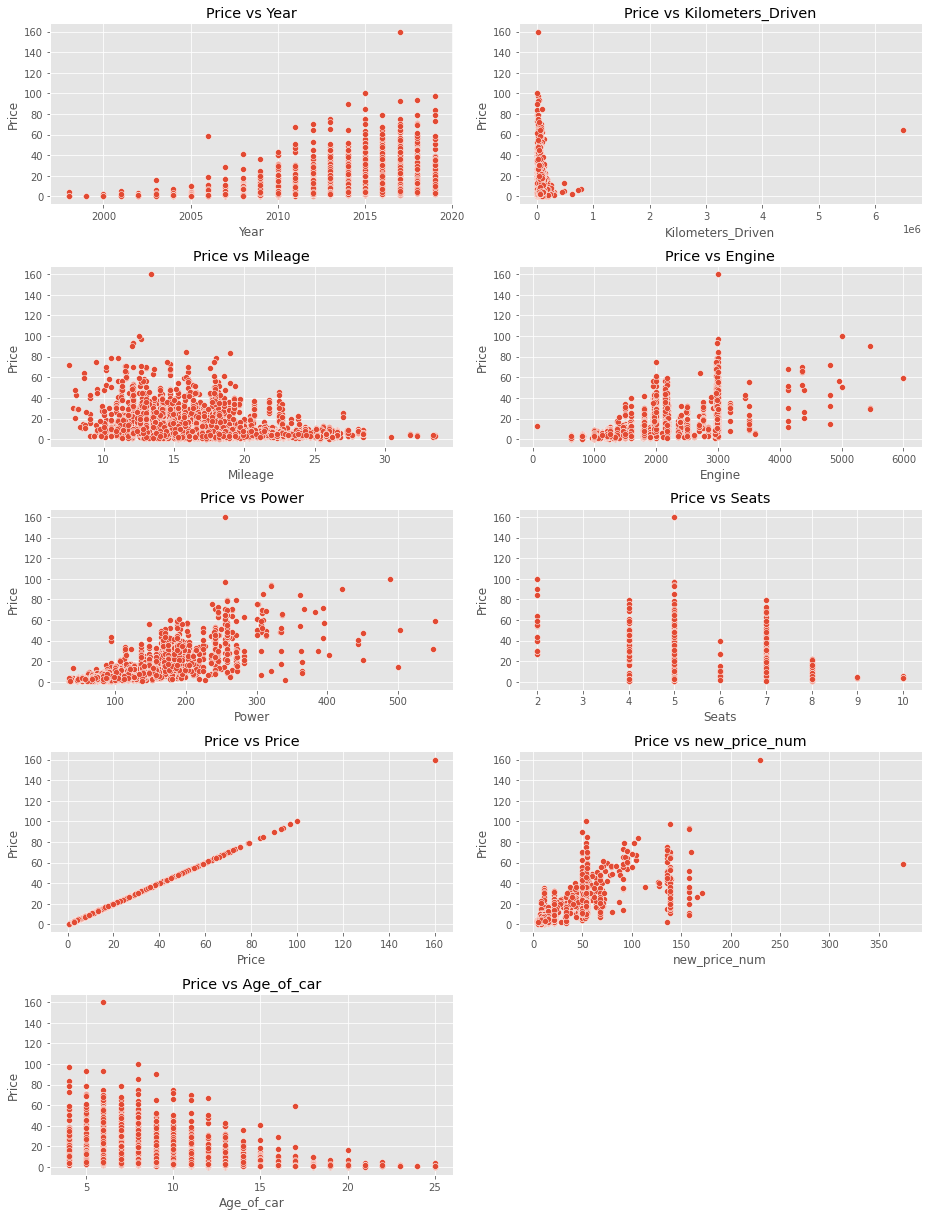

In [103]:
numeric_columns=df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=df[variable],y=df['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

In [104]:
df['Name']=df['Name'].astype('category')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7094 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7094 non-null   category
 1   Location           7094 non-null   category
 2   Year               7094 non-null   int64   
 3   Kilometers_Driven  7094 non-null   int64   
 4   Fuel_Type          7094 non-null   category
 5   Transmission       7094 non-null   category
 6   Owner_Type         7094 non-null   category
 7   Mileage            7094 non-null   float64 
 8   Engine             7094 non-null   float64 
 9   Power              7094 non-null   float64 
 10  Seats              7094 non-null   float64 
 11  Price              5892 non-null   float64 
 12  new_price_num      7094 non-null   float64 
 13  Age_of_car         7094 non-null   int64   
 14  Brand              7094 non-null   category
 15  Model              7094 non-null   category
dtypes: category

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [107]:
quant_var=df.select_dtypes(include=np.number)

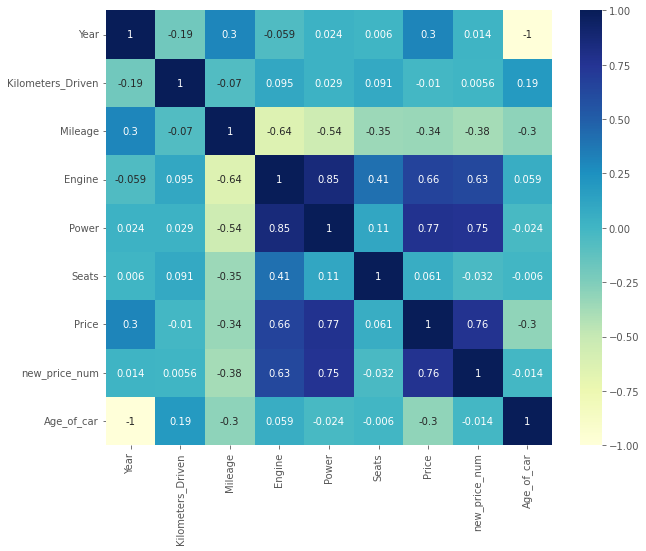

In [108]:
plt.figure(figsize=(10,8))
sns.heatmap(quant_var.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

Engine has strong positive correlation to Power [0.85].

Price has positive correlation to Engine[0.66] as well Power [0.77].

Mileage is negative correlated to Engine, Power, Price, Ageofcar

Price has negative correlation to age of car.

Kilometer driven doesnt impact Price

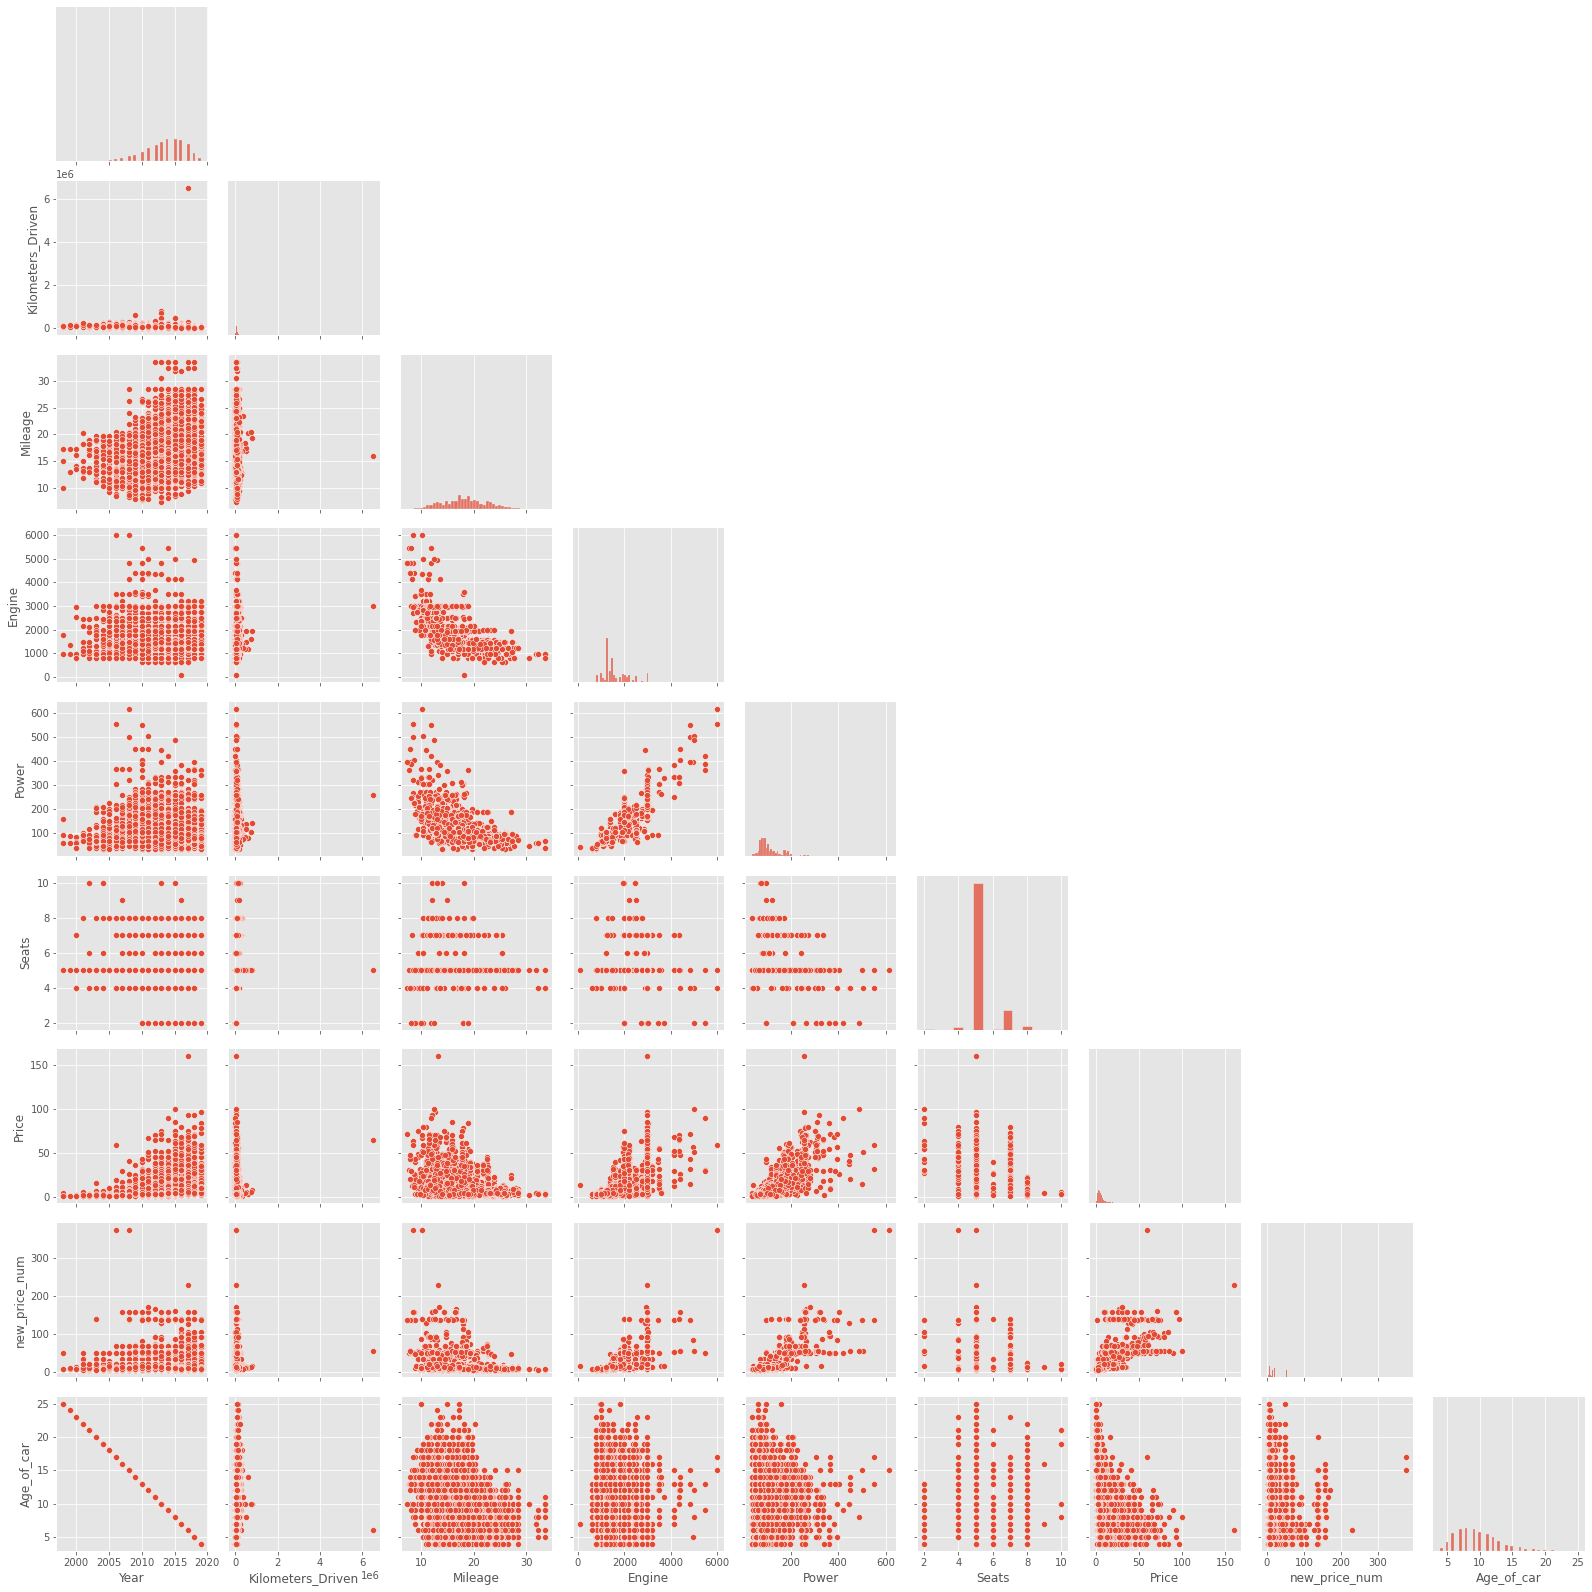

In [109]:
sns.pairplot(data=df , corner=True)
plt.show()

Same observation about correlation as seen in heatmap.

Kilometer driven doesnot have impact on Price .

As power increase mileage decrease.

Car with recent make sell at higher prices.

Engine and Power increase , price of the car seems to increase.

# Analysing Variables that are correlated with Price variable

Price Vs Engine (transmission)

<Axes: title={'center': 'Price VS Engine based on Transmission'}, xlabel='Price', ylabel='Engine'>

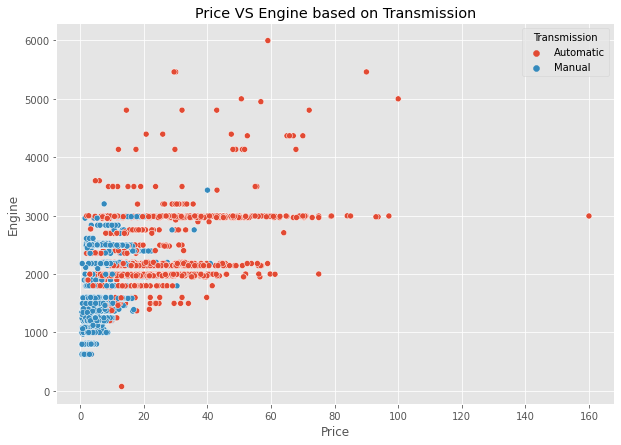

In [110]:
# relationship of Engine vs Price and Transmimssion
plt.figure(figsize=(10,7))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=df)

Price Vs Power

<Axes: title={'center': 'Price vs Power based on Transmission'}, xlabel='Price', ylabel='Power'>

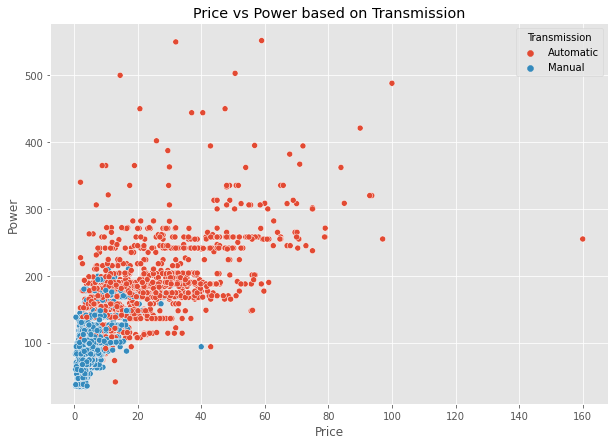

In [111]:
 #relationship betweem Price and Power
plt.figure(figsize=(10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power', x='Price', hue='Transmission', data=df)

Mileage Vs Price

<Axes: title={'center': 'Price vs Mileage based on Transmission'}, xlabel='Price', ylabel='Mileage'>

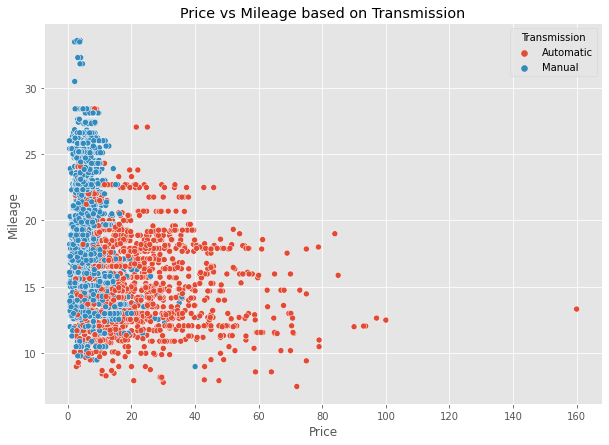

In [112]:
 #relationship betweem Price and Mileage
plt.figure(figsize=(10,7))
plt.title("Price vs Mileage based on Transmission")
sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=df)

Mileage Vs Price w.r.t Fuel type

<Axes: title={'center': 'Price Vs Mileage'}, xlabel='Mileage', ylabel='Price'>

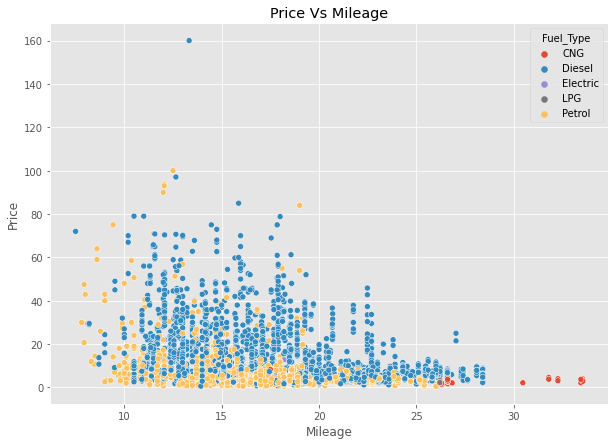

In [113]:
# Understand relationships  between price and mileage
plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=df)

Price Vs Year

<Axes: title={'center': 'Price based on manufacturing Year of model'}, xlabel='Year', ylabel='Price'>

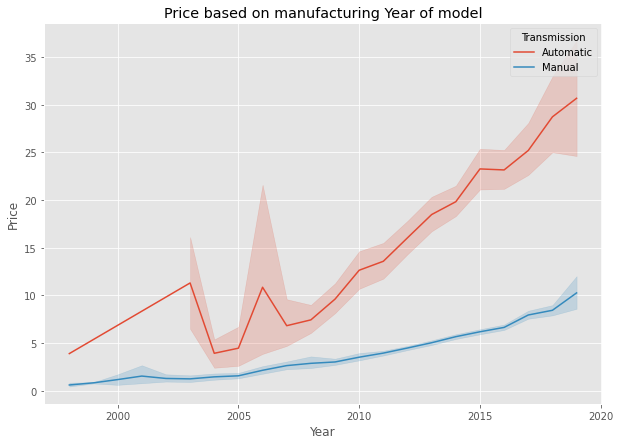

In [114]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission',
             data=df)

Price Vs Age of car

<Axes: title={'center': 'Price based on manufacturing Year of model'}, xlabel='Age_of_car', ylabel='Price'>

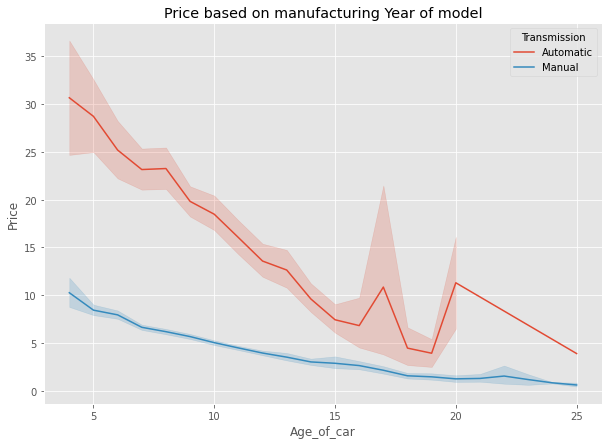

In [115]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Age_of_car', y='Price',hue='Transmission',
             data=df)

Price Vs Year w.r.t Fuel type

<Axes: title={'center': 'Price Vs Year VS FuelType'}, xlabel='Year', ylabel='Price'>

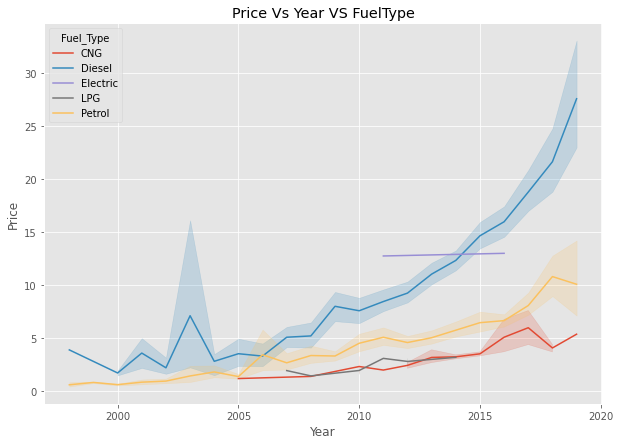

In [116]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',
             data=df)

Price Vs Year w.r.t Owner type

<Axes: title={'center': 'Price Vs Year VS Owner_Type'}, xlabel='Year', ylabel='Price'>

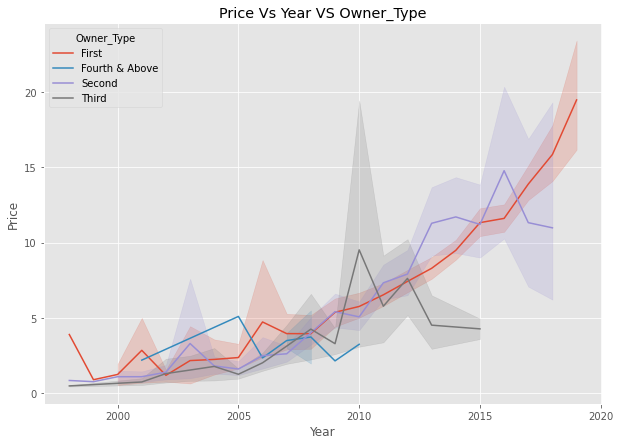

In [117]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='Year', y='Price',hue='Owner_Type',
             data=df)

Need to check the reason for spike in price for third owner and model in 2010

In [118]:
df[(df["Owner_Type"]=='Third') & (df["Year"].isin([2010]))].sort_values(by='Price',ascending =False)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,new_price_num,Age_of_car,Brand,Model
2978,Porsche Panamera 2010 2013 4S,Coimbatore,2010,42400,Petrol,Automatic,Third,8.00000,4806.00000,394.30000,4.00000,42.91000,136.00000,13,Porsche,Panamera2010
5404,BMW 5 Series 2003-2012 520d,Pune,2010,170000,Diesel,Automatic,Third,18.48000,1995.00000,177.00000,5.00000,12.00000,67.87000,13,BMW,5Series
3293,Toyota Innova 2.5 GX 7 STR,Pune,2010,140000,Diesel,Manual,Third,12.80000,2494.00000,102.00000,7.00000,6.25000,21.08500,13,Toyota,Innova2.5
4962,Mahindra Scorpio VLX,Bangalore,2010,144400,Diesel,Manual,Third,12.05000,2179.00000,120.00000,8.00000,5.25000,10.90000,13,Mahindra,ScorpioVLX
3479,Volkswagen Passat 1.8 TSI MT,Mumbai,2010,60000,Petrol,Manual,Third,14.30000,1798.00000,160.00000,5.00000,3.50000,10.94000,13,Volkswagen,Passat1.8
1629,Maruti Swift Lxi BSIII,Pune,2010,54898,Petrol,Manual,Third,16.10000,1298.00000,88.20000,5.00000,2.50000,7.00000,13,Maruti,SwiftLxi
5351,Volkswagen Polo Petrol Highline 1.2L,Pune,2010,79000,Petrol,Manual,Third,16.47000,1198.00000,73.90000,5.00000,2.44000,10.94000,13,Volkswagen,PoloPetrol
698,Ford Figo Diesel ZXI,Jaipur,2010,100002,Diesel,Manual,Third,20.00000,1399.00000,68.00000,5.00000,1.28000,11.47500,13,Ford,FigoDiesel
6190,Tata Indica Vista Aqua TDI BSIII,Chennai,2010,93600,Diesel,Manual,Third,17.00000,1405.00000,71.00000,5.00000,NaN,7.70000,13,Tata,IndicaVista
6677,Fiat Punto 1.4 Emotion,Jaipur,2010,65000,Petrol,Manual,Third,14.60000,1493.00000,93.70000,5.00000,NaN,8.62500,13,Fiat,Punto1.4


The observation is for The Porsche Panamera is expensive and luxury car so the data is valid.

Price Vs Number of seats

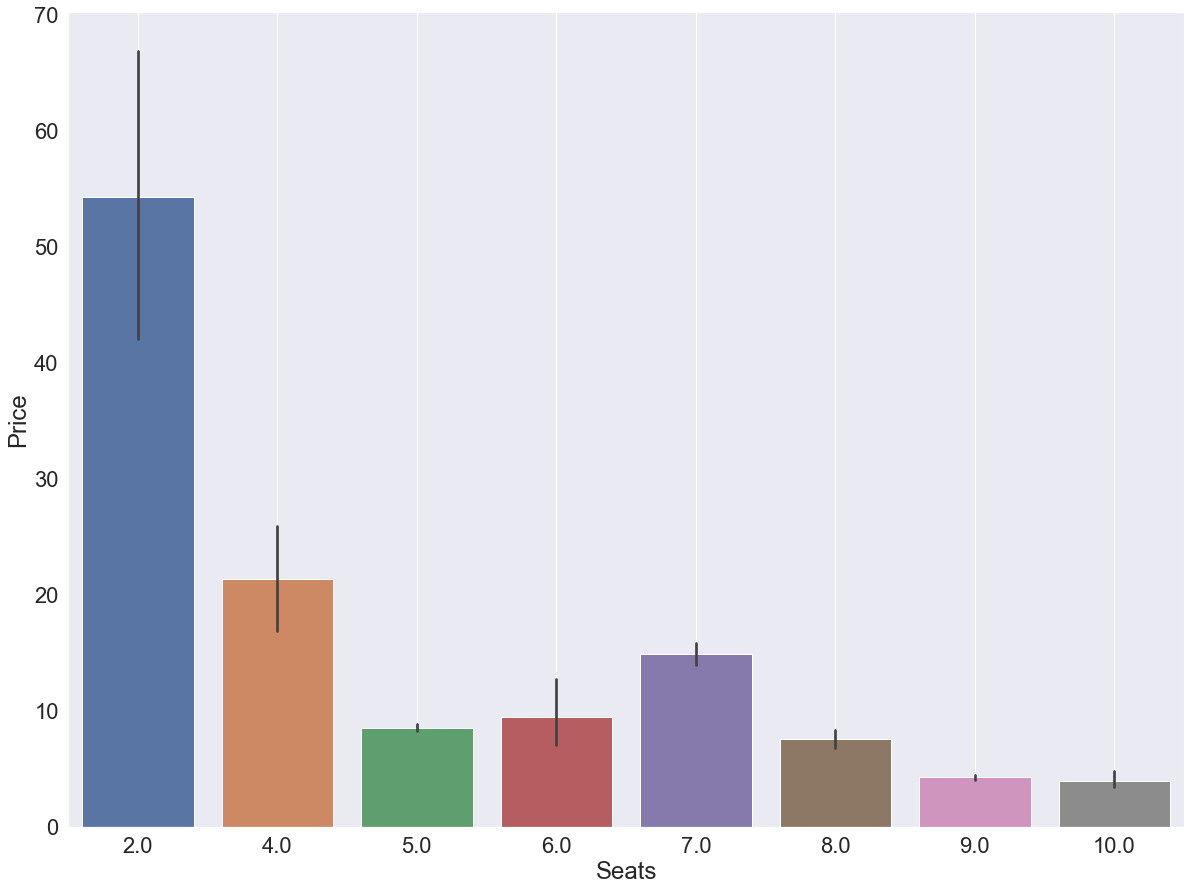

In [119]:
#Price and seats 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Seats', y='Price', data=df)
plt.grid()

Price Vs Location

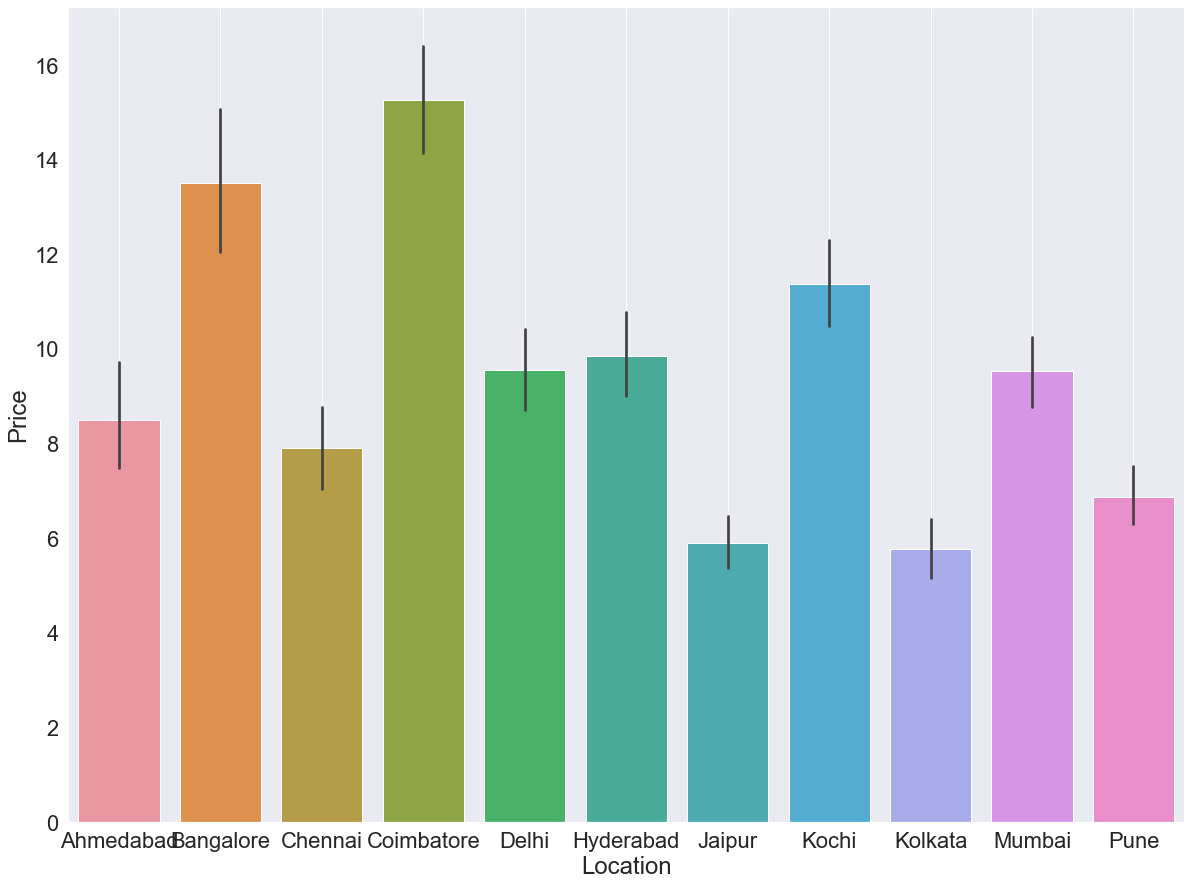

In [120]:
#Price and LOcation 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Location', y='Price', data=df)
plt.grid()

Price Vs Brands

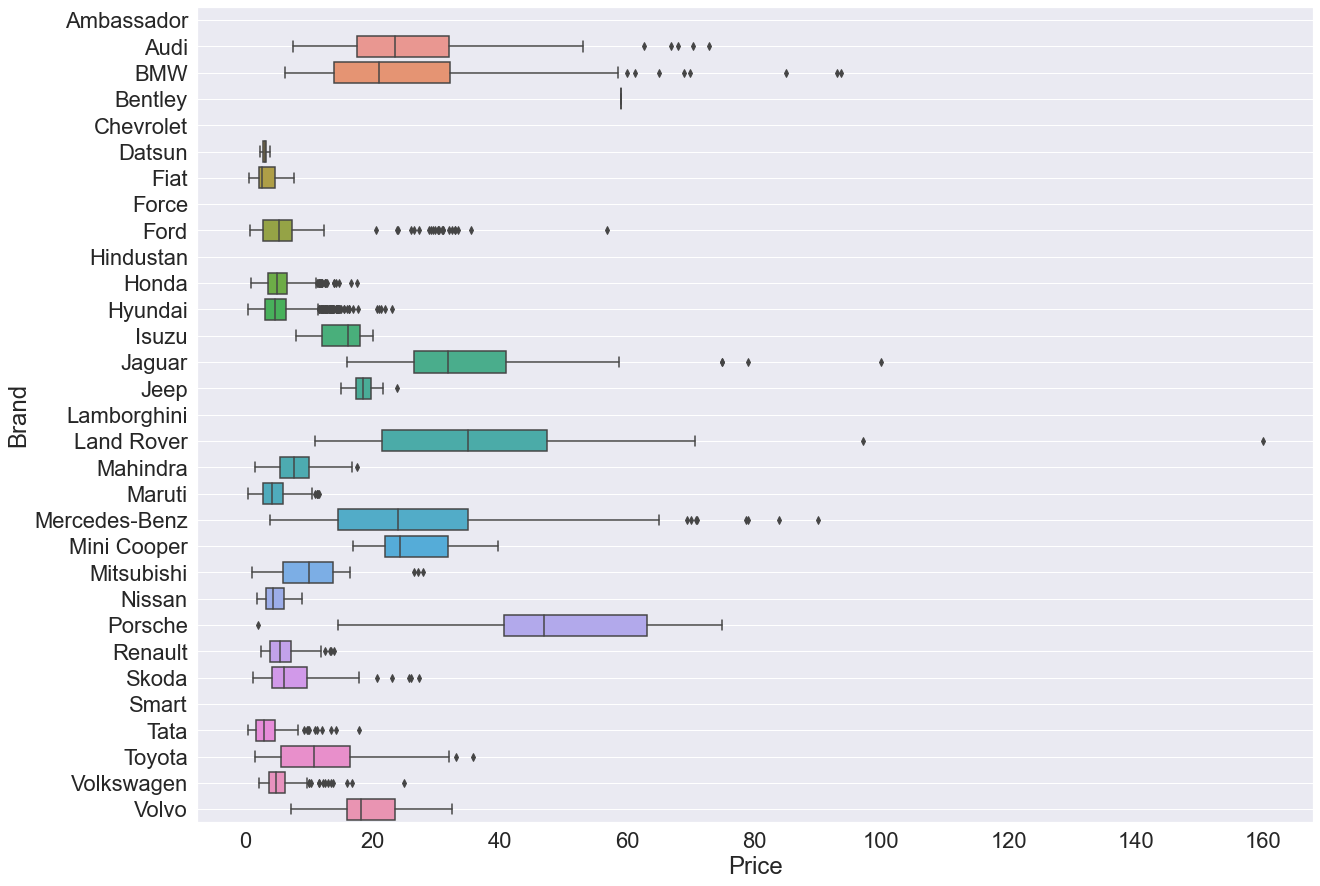

In [121]:
#Price and band 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='Price', y='Brand', data=df)
plt.grid()

Price Vs Year based on Owner type and Transmission

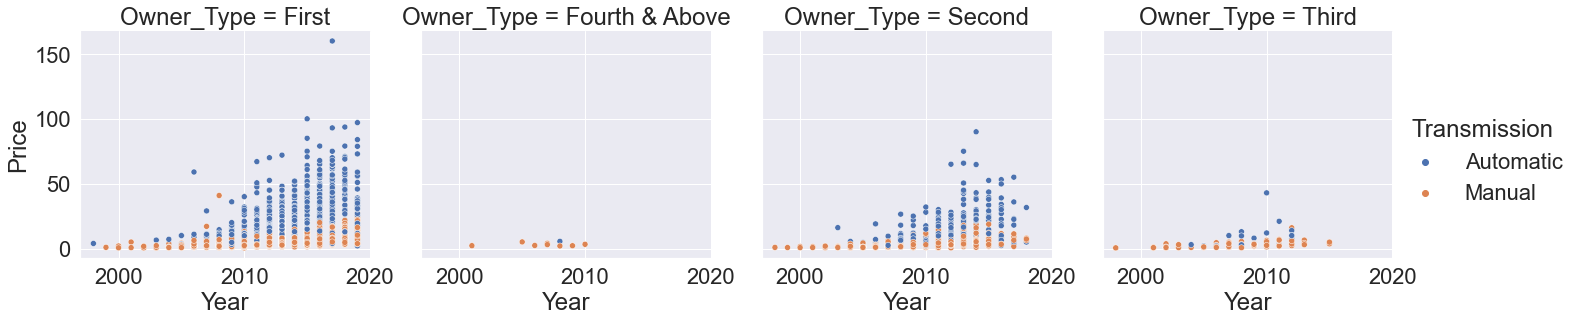

In [122]:
sns.relplot(data=df, y='Price',x='Year',col='Owner_Type',hue='Transmission',aspect=1,height=5)

Price Vs Engine based on Transmission and Fuel type

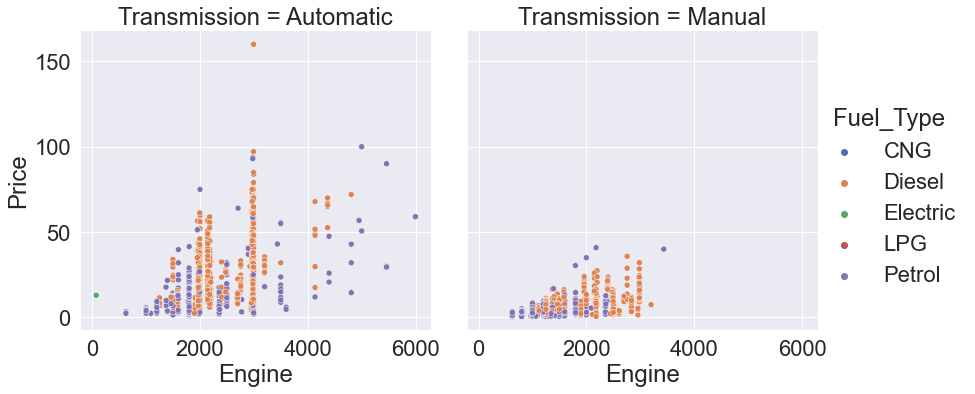

In [123]:
sns.relplot(data=df, y='Price',x='Engine',col='Transmission',aspect=1,height=6,hue="Fuel_Type")

Price Vs Age of car based on Transmission type

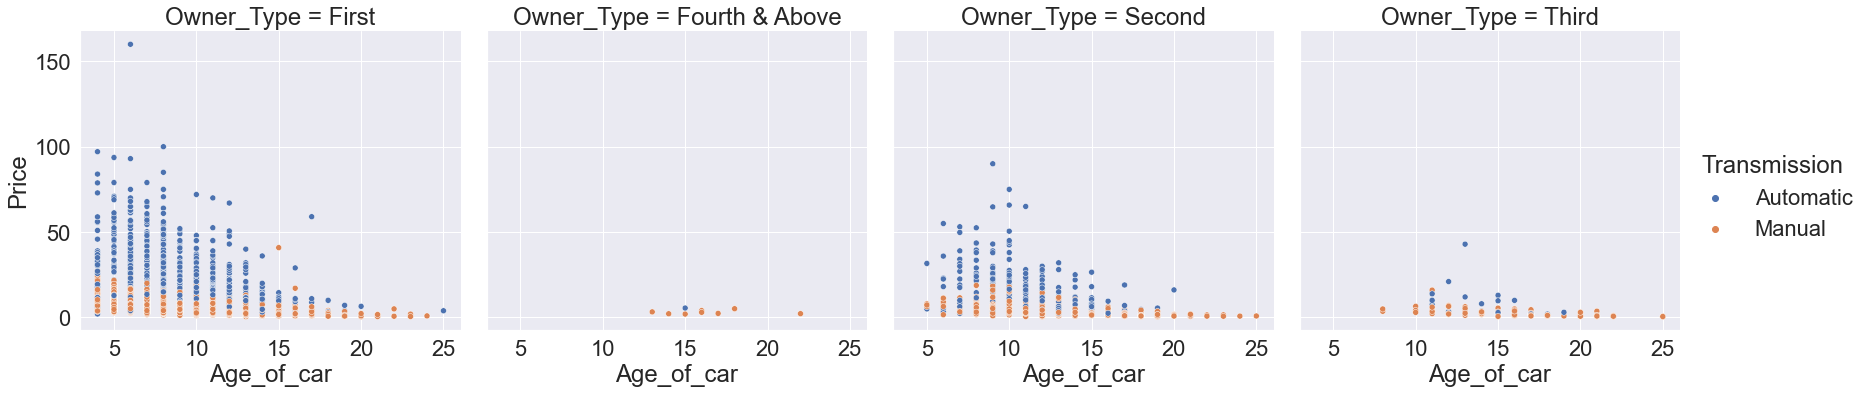

In [124]:
sns.relplot(data=df, y='Price',x='Age_of_car',col='Owner_Type',aspect=1,height=6,hue='Transmission')

Expensive cars are in Coimbatore and Banglore.

2 Seater cars are more expensive.

Deisel Fuel type car are more expensive compared to other fuel type.

As expected, Older model are sold cheaper compared to latest model

Automatic transmission vehicle have a higher price than manual transmission vehicles.

Vehicles with more engine capacity have higher prices.

Price decreases as number of owner increases.

Automatic transmission require high engine and power.

Prices for Cars with fuel type as Deisel has increased with recent models

Engine, Power, Age of car, Mileage, Fuel type, location, Transmission effect the price.

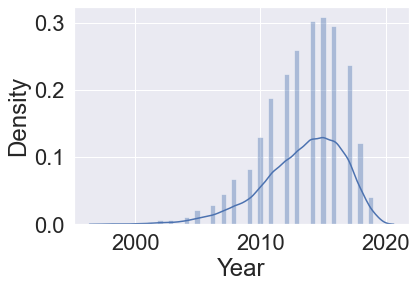

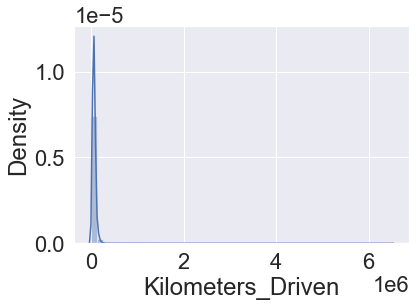

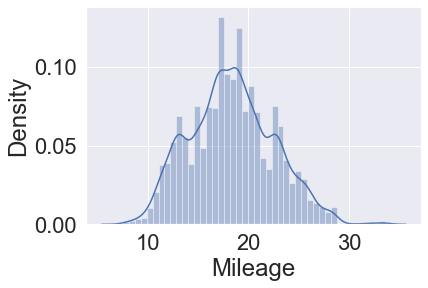

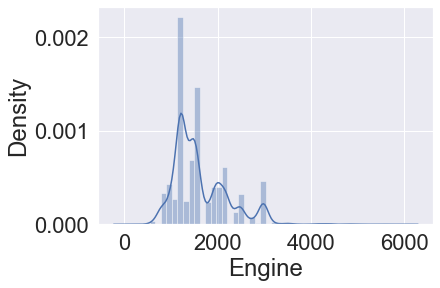

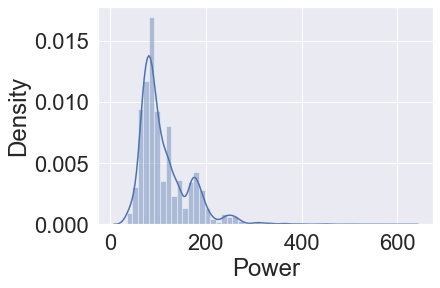

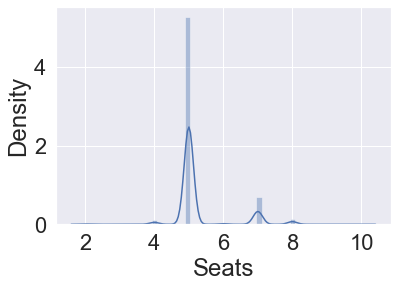

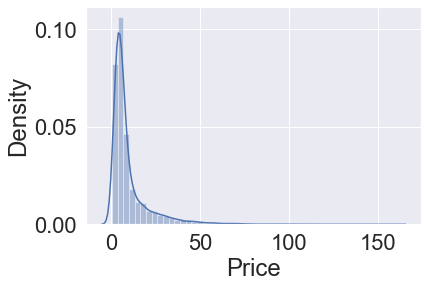

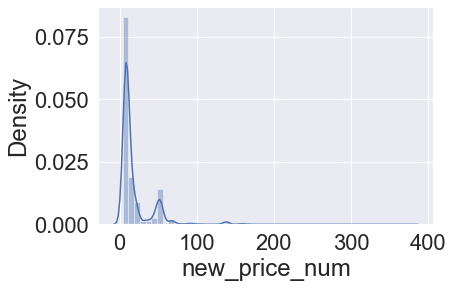

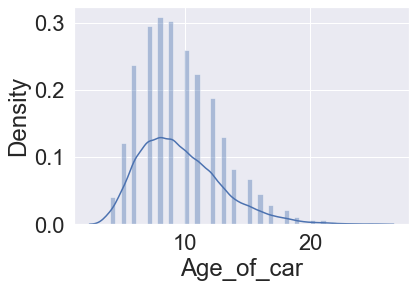

In [125]:
# check distrubution if skewed. If distrubution is skewed , it is advice to use log transform
cols_to_log = df.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(df[colname], kde=True)
    plt.show()

Most of the distributions are right skewed that means most of the data points are on the left side

Definig a function for log transformation

In [126]:
def Perform_log_transform(data,col_log):
    """#Perform Log Transformation of dataframe , and list of columns """
    for colname in col_log:
        data[colname + '_log'] = np.log(data[colname])
    #df.drop(col_log, axis=1, inplace=True)
    data.info()

In [127]:
#This needs to be done before the data is split
Perform_log_transform(df,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Index: 7094 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   7094 non-null   category
 1   Location               7094 non-null   category
 2   Year                   7094 non-null   int64   
 3   Kilometers_Driven      7094 non-null   int64   
 4   Fuel_Type              7094 non-null   category
 5   Transmission           7094 non-null   category
 6   Owner_Type             7094 non-null   category
 7   Mileage                7094 non-null   float64 
 8   Engine                 7094 non-null   float64 
 9   Power                  7094 non-null   float64 
 10  Seats                  7094 non-null   float64 
 11  Price                  5892 non-null   float64 
 12  new_price_num          7094 non-null   float64 
 13  Age_of_car             7094 non-null   int64   
 14  Brand                  7094 non-null   catego

Removing the columns which are not useful for model

In [128]:
df.drop(['Name','Model','Year','Brand','new_price_num'],axis=1,inplace=True)

In [129]:
df.isna().sum()

Location                    0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     0
Engine                      0
Power                       0
Seats                       0
Price                    1202
Age_of_car                  0
Kilometers_Driven_log       0
Price_log                1202
dtype: int64

In [130]:
df.dropna(inplace=True)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5892 entries, 0 to 6017
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               5892 non-null   category
 1   Kilometers_Driven      5892 non-null   int64   
 2   Fuel_Type              5892 non-null   category
 3   Transmission           5892 non-null   category
 4   Owner_Type             5892 non-null   category
 5   Mileage                5892 non-null   float64 
 6   Engine                 5892 non-null   float64 
 7   Power                  5892 non-null   float64 
 8   Seats                  5892 non-null   float64 
 9   Price                  5892 non-null   float64 
 10  Age_of_car             5892 non-null   int64   
 11  Kilometers_Driven_log  5892 non-null   float64 
 12  Price_log              5892 non-null   float64 
dtypes: category(4), float64(7), int64(2)
memory usage: 484.2 KB


# Model Building

In [132]:
X = df.drop(["Price", "Price_log","Kilometers_Driven"], axis=1)
y = df[["Price_log","Price"]]

Since we have some categorical variables as our independent variables. so we need to create dummies for the model building. Location, Fuel type, transmission and owner type are the variables which needs dummies. for that we are defining a function to make dummies.

In [133]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["category"]).columns.tolist(),
        drop_first=True,
        dtype=int
    )
    return x

In [134]:
#Dummy variable creation is done before spliting the data , so all the different categories are covered
#create dummy variable
X = encode_cat_vars(X)
X.head()

,Mileage,Engine,Power,Seats,Age_of_car,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,26.60000,998.00000,58.16000,5.00000,13,11.18442,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,19.67000,1582.00000,126.20000,5.00000,8,10.62133,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,18.20000,1199.00000,88.70000,5.00000,12,10.73640,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,20.77000,1248.00000,88.76000,7.00000,11,11.37366,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,15.20000,1968.00000,140.80000,5.00000,10,10.61325,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [135]:
X.isnull().sum()

Mileage                      0
Engine                       0
Power                        0
Seats                        0
Age_of_car                   0
Kilometers_Driven_log        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [136]:
y.isnull().sum()

Price_log    0
Price        0
dtype: int64

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.reset_index()
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (4124, 24)
X_test: (1768, 24)
y_train: (4124, 2)
y_test: (1768, 2)


# Building Model using statsmodel library

In [138]:
# Statsmodel api does not add a constant by default. We need to add it explicitly.
X_train = sm.add_constant(X_train)
# Add constant to test data
X_test = sm.add_constant(X_test)

In [139]:
olsmodel1 = sm.OLS(y_train["Price"], X_train).fit()

In [140]:
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     418.0
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:41:02   Log-Likelihood:                -13270.
No. Observations:                4124   AIC:                         2.659e+04
Df Residuals:                    4099   BIC:                         2.675e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [141]:
olsmodel2 = sm.OLS(y_train["Price_log"], X_train).fit()

In [142]:
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1332.
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:41:08   Log-Likelihood:                -792.97
No. Observations:                4124   AIC:                             1636.
Df Residuals:                    4099   BIC:                             1794.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

R^2 is better for model 2 which has dependent variable as log of price. 
Seats variable is not significant in model 2 but the variable is important to predict the price of a used car, so we are keeping that in our model.
Some of the dummy variables are also has p value greater than 0.05 but still keeping it in the model because of its importance in prediction of price.

In [143]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["Price"]

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["Price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel2, X_train, X_test)  # High Overfitting.

    Data    RMSE     MAE     MAPE
0  Train 7.49944 2.41674 23.67287
1   Test 8.63317 2.74188 24.06134


# Checking Assumptions

1.No Multicollinearity

2.Mean of residuals should be 0

3.No Heteroscedasticity

4.Linearity of variables

5.Normality of error terms

6.No auto correlation among the residuals

Checking Assumption 1: No Multicollinearity
    
We will use VIF, to check if there is multicollinearity in the data.

Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

In [145]:
print(checking_vif(X_train))

                      feature       VIF
0                       const 769.12252
1                     Mileage   3.37142
2                      Engine   8.77773
3                       Power   6.45972
4                       Seats   1.95021
5                  Age_of_car   2.07438
6       Kilometers_Driven_log   1.72057
7          Location_Bangalore   2.40968
8            Location_Chennai   2.98703
9         Location_Coimbatore   3.44434
10             Location_Delhi   3.20223
11         Location_Hyderabad   3.79618
12            Location_Jaipur   2.69709
13             Location_Kochi   3.51542
14           Location_Kolkata   3.04450
15            Location_Mumbai   3.97898
16              Location_Pune   3.37661
17           Fuel_Type_Diesel  27.14344
18         Fuel_Type_Electric   1.06065
19              Fuel_Type_LPG   1.19207
20           Fuel_Type_Petrol  28.03135
21        Transmission_Manual   1.91698
22  Owner_Type_Fourth & Above   1.00853
23          Owner_Type_Second   1.16820


Power and engine has VIF more than 5. to remove multicollinearity we remove engine from our dataset because power is more important than engine when it comes to predict the price of a car.

In [147]:
X_train1=X_train.drop(['Engine'],axis=1)
X_test1=X_test.drop(['Engine'],axis=1)

olsmodel3 = sm.OLS(y_train["Price_log"], X_train1).fit()

print(olsmodel3.summary())

# Checking model performance
model_pref(olsmodel3, X_train1, X_test1)

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1371.
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:58:43   Log-Likelihood:                -818.54
No. Observations:                4124   AIC:                             1685.
Df Residuals:                    4100   BIC:                             1837.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [148]:
print(checking_vif(X_train1))

                      feature       VIF
0                       const 756.06736
1                     Mileage   2.77004
2                       Power   2.80073
3                       Seats   1.65440
4                  Age_of_car   2.07075
5       Kilometers_Driven_log   1.72026
6          Location_Bangalore   2.40962
7            Location_Chennai   2.98453
8         Location_Coimbatore   3.44423
9              Location_Delhi   3.20181
10         Location_Hyderabad   3.79523
11            Location_Jaipur   2.69688
12             Location_Kochi   3.51537
13           Location_Kolkata   3.04438
14            Location_Mumbai   3.97889
15              Location_Pune   3.37619
16           Fuel_Type_Diesel  27.13190
17         Fuel_Type_Electric   1.05945
18              Fuel_Type_LPG   1.18952
19           Fuel_Type_Petrol  27.72211
20        Transmission_Manual   1.90884
21  Owner_Type_Fourth & Above   1.00853
22          Owner_Type_Second   1.16759
23           Owner_Type_Third   1.09798


We have removed multicollinearity from the data now. Fuel_Type variables are showing high VIF because most cars are either diesel and petrol. These two features are correlated with each other.

We will not drop this variable from the model because this will not affect the interpretation of other features in the model.

Checking Assumption 2: Mean of residuals should be 0

In [149]:
residuals = olsmodel3.resid
np.mean(residuals)

-1.0959656503806977e-14

Mean of redisuals is very close to 0. 

The second assumption is also satisfied.

Checking Assumption 3: No Heteroscedasticity

Homoscedacity - If the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form a funnel shape or any other non symmetrical shape.

We'll use Goldfeldquandt Test to test the following hypothesis

Null hypothesis : Residuals are homoscedastic Alternate hypothesis : Residuals have hetroscedasticity

alpha = 0.05

In [152]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train1)
lzip(name, test)

[('F statistic', 0.8868663623120212), ('p-value', 0.996628050191801)]

Since p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic.

Assumptions 3 is also satisfied by our olsmodel3

Checking Assumption 4: Linearity of variables
Predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x axis. we can also use scatter plot for each independent variable and dependent variable to identify the linear relationship (this we have already done during EDA)

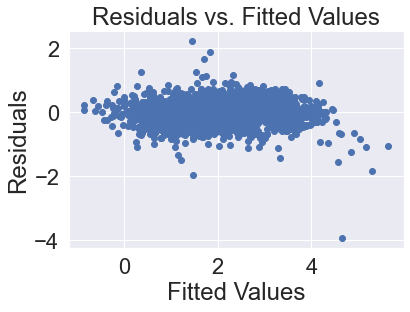

In [153]:
plt.scatter(olsmodel3.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

There is no pattern in the residual vs fitted values plot.

Assumptions 4 is satisfied by our olsmodel2. 

Checking Assumption 5: Normality of error terms

The residuals should be normally distributed. this can be tested by either looking at distribution plot for residuals or by QQ plot for residuals

<Axes: ylabel='Density'>

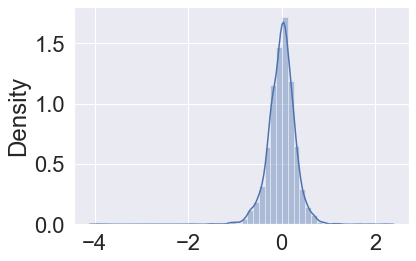

In [154]:
sns.distplot(residuals)

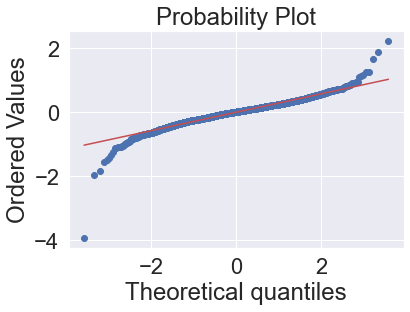

In [155]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

The residuals have a close to normal distribution. We should further investigate these values in the tails where we have made huge residual errors.

Assumption 5 is also satisfied.

Checking assumption 6: No auto correlation among the residuals. 

the test statistic ranges from 0 to 4, 

where:

DW close to 2: Indicates no autocorrelation.

DW < 2: Suggests positive autocorrelation (residuals are positively correlated).

DW > 2: Suggests negative autocorrelation (residuals are negatively correlated).

In [156]:
durbin_watson_stat = sm.stats.durbin_watson(residuals)
print("Durbin-Watson statistic:", durbin_watson_stat)

Durbin-Watson statistic: 2.0040608186102498


The value is close to 2. 

Assumption 6 is also satisfied

All the assumptions are checked and satisfied. so we can go forward with this model to make infrences and recommendations to the business

In [157]:
print(olsmodel3.summary())
# Checking model performance
model_pref(olsmodel3, X_train1, X_test1)

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1371.
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:22:38   Log-Likelihood:                -818.54
No. Observations:                4124   AIC:                             1685.
Df Residuals:                    4100   BIC:                             1837.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

It is important to note here that the predicted values are log(price) and therefore coefficients have to be converted accordingly to understand their influence in price.

With our linear regression model we have been able to capture ~89 % variation in our dependent variable.

The model indicates that the most significant predictors of price of used cars are -

Mileage
Power of the engine
Number of seats in the car
Age of the car
Kilometers Driven
Location
Fuel_Type
Transmission - Automatic/Manual
OwnerType

Newer cars sell for higher prices. 1 unit increase in age of the car leads to [ exp(0.1121) = 1.11 Lakh ] decrease in the price of the vehicle, when everything else is constant.

As the number of seats increases, the price of the car increases - exp(0.01) = 1.01 Lakhs

Mileage is inversely correlated with Price. Generally, high mileage cars are the lower budget cars.

Kilometers Driven have a negative relationship with the price which is intuitive. A car that has been driven more will have more wear and tear and hence sell at a lower price, everything else being 0.

The categorical variables are a little hard to interpret. But it can be seen that most of the car_category variables in the dataset have a negative relationship with the Price.

Electric vehicles are more expensive compared to other fuel types

Our MAPE value is 23. so we can say that on an average our prediction deviates from the actual value by 23 %

Markets like Kolkata(coeff = -0.2) are very risky and we need to be careful about investments in this area.